# Analyse predictions

In [1]:
from toolbox import *

import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

import random
import pickle
import glob
import os

In [2]:
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

## Load model predictions

In [29]:
# Load hillshade DEM
dem, dem_extent = load_dem('./data/dem/bergstraße30_shaded.tif')

In [3]:
gs = load_groundwater_station_data('./data/groundwater/bergstraße/gw_stations_bergstraße.csv')
gs = gs[['station_id', 'geometry']]
gs.head()

,station_id,geometry
0,12890,POINT (8.42892 49.70283)
1,12891,POINT (8.48631 49.70426)
2,12892,POINT (8.38953 49.70415)
3,12893,POINT (8.46023 49.70451)
4,12894,POINT (8.40465 49.70432)


In [4]:
pred_folder = './data/predictions'
past_data_path = './data/predictions/past_data.feather'
predictions = {}

# load predictions data
for path in glob.iglob(f'{pred_folder}/add*.feather'):
    pred_name = os.path.splitext(os.path.basename(path))[0]
    print(pred_name)#, path)
    p = pd.read_feather(path)
    p = pd.merge(p, gs, how='left', on='station_id')
    predictions[pred_name] = p

# load past data
past = pd.read_feather(past_data_path)
past = pd.merge(past, gs, how='left', on='station_id')
past = past.loc[past['date'] >= pd.to_datetime('1974-01-01')]
past = past.loc[past['date'] <= pd.to_datetime('2000-12-31')]
predictions['past_data'] = past

add_t+4_p+10
add_ref
add_t+4_p-10


In [5]:
past = predictions['past_data'].set_index('date')
pred = predictions['add_t+4_p-10'].set_index('date')
base = predictions['add_ref'].set_index('date')
#past = predictions['past_data'].set_index('date')
#pred = predictions['avg_t+4_p-10'].set_index('date')
#base = predictions['avg_t0_p0'].set_index('date')

In [6]:
#past.info()

## Analyze predictions over time

Must be resampled because station data begins on different dates.

In [7]:
past.columns.unique()

Index(['station_id', 'ground_elev', 'x', 'y', 'reg_clusters',
       'ini_years_water_depth_mean', 'ini_years_water_depth_std',
       'ini_years_water_depth_min', 'ini_years_water_depth_max', 'precip_mean',
       'tmean_mean', 'moisture_mean', 'precip_mean_prev_2d_sum',
       'precip_mean_prev_7d_sum', 'precip_mean_prev_30d_sum',
       'precip_mean_prev_90d_sum', 'precip_mean_prev_1y_sum',
       'precip_mean_prev_3y_sum', 'tmean_mean_prev_2d_mean',
       'tmean_mean_prev_7d_mean', 'tmean_mean_prev_30d_mean',
       'tmean_mean_prev_90d_mean', 'tmean_mean_prev_1y_mean',
       'tmean_mean_prev_3y_mean', 'water_depth', 'pred_water_depth',
       'geometry'],
      dtype='object')

In [8]:
intervals = {'weekly': 'W', 'monthly': 'M', 'quarterly': 'Q'}
for i in intervals:
    print(i)

weekly
monthly
quarterly


In [9]:
pasts, preds, bases = create_resamples(past, pred, base, gs)

### Weekly

In [33]:
past = pasts['weekly']
pred = preds['weekly']
base = bases['weekly']

Text(0, 0.5, 'Water depth (m)')

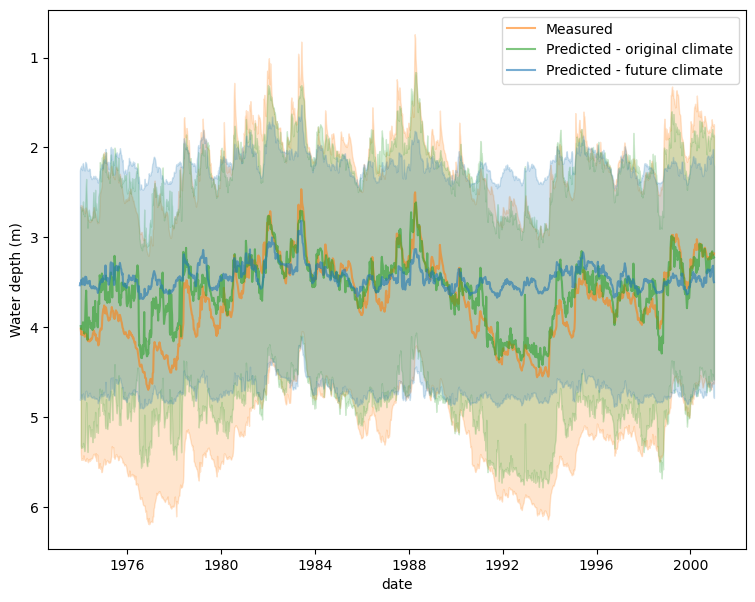

In [36]:
fig, ax = plt.subplots(figsize=(9,7), sharex=True)
ax.invert_yaxis()

sns.lineplot(data=past, x="date", y="water_depth", 
             errorbar='sd', color='tab:orange', alpha=0.6, ax=ax,
             label='Measured')
#sns.lineplot(data=past_weekly, x="date", y="pred_water_depth", 
#             errorbar='sd', color='tab:red', alpha=0.6, ax=ax,
#            label='Predicted - original climate')
sns.lineplot(data=past, x="date", y="pred_water_depth", 
             errorbar='sd', color='tab:green', alpha=0.6, ax=ax,
            label='Predicted - original climate')
sns.lineplot(data=pred, x="date", y="pred_water_depth", 
             errorbar='sd', color='tab:blue', alpha=0.6, ax=ax,
            label='Predicted - future climate')
ax.set_ylabel('Water depth (m)')

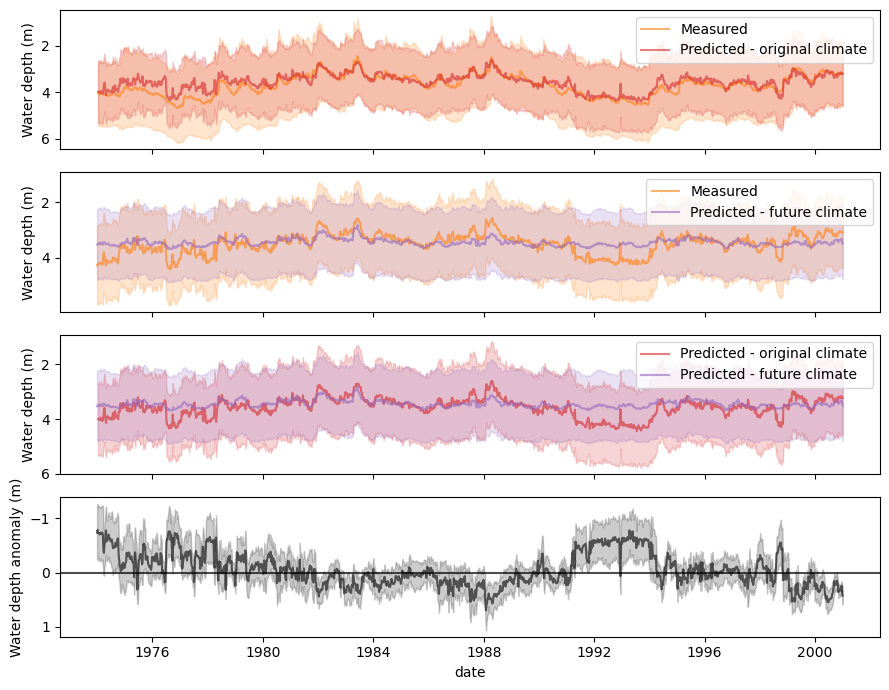

In [12]:
plot_compare_scenario(past, base, pred)

In [13]:
cl = 6
past_filtered = past.loc[past['reg_clusters'] == cl]
base_filtered = base.loc[base['reg_clusters'] == cl]
pred_filtered = pred.loc[pred['reg_clusters'] == cl]

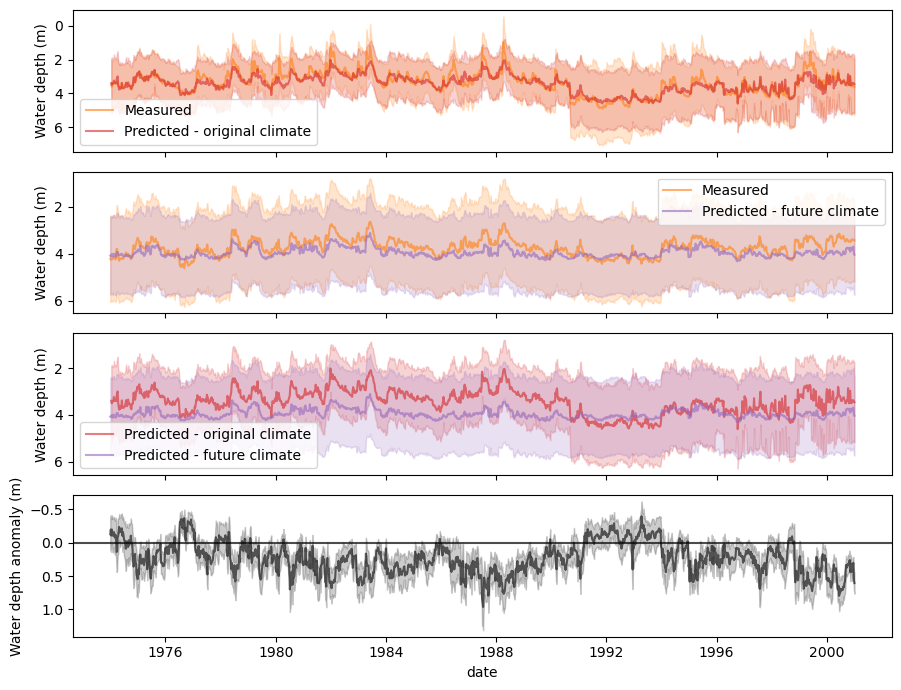

In [14]:
plot_compare_scenario(past_filtered, base_filtered, pred_filtered)

### Monthly

In [15]:
past = pasts['monthly']
pred = preds['monthly']
base = bases['monthly']

Text(0, 0.5, 'Water depth (m)')

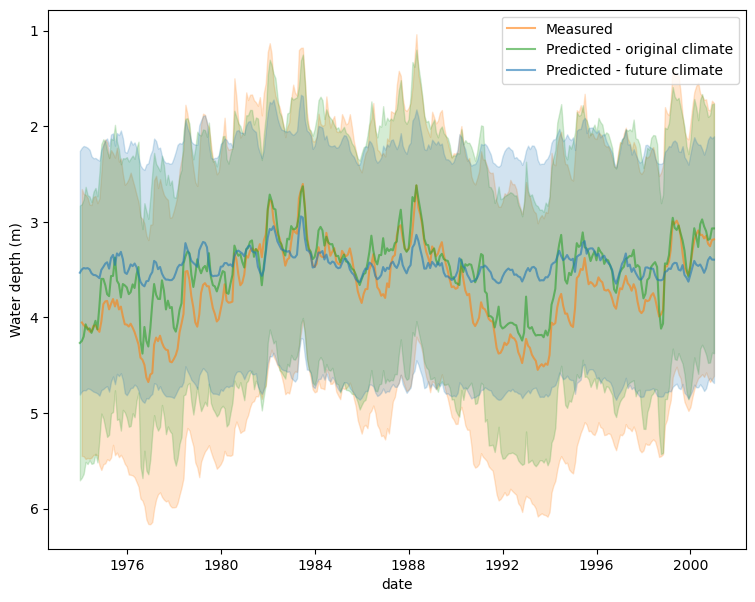

In [16]:
fig, ax = plt.subplots(figsize=(9,7), sharex=True)
ax.invert_yaxis()

sns.lineplot(data=past, x="date", y="water_depth", 
             errorbar='sd', color='tab:orange', alpha=0.6, ax=ax,
             label='Measured')
#sns.lineplot(data=past_weekly, x="date", y="pred_water_depth", 
#             errorbar='sd', color='tab:red', alpha=0.6, ax=ax,
#            label='Predicted - original climate')
sns.lineplot(data=base, x="date", y="pred_water_depth", 
             errorbar='sd', color='tab:green', alpha=0.6, ax=ax,
            label='Predicted - original climate')
sns.lineplot(data=pred, x="date", y="pred_water_depth", 
             errorbar='sd', color='tab:blue', alpha=0.6, ax=ax,
            label='Predicted - future climate')
ax.set_ylabel('Water depth (m)')

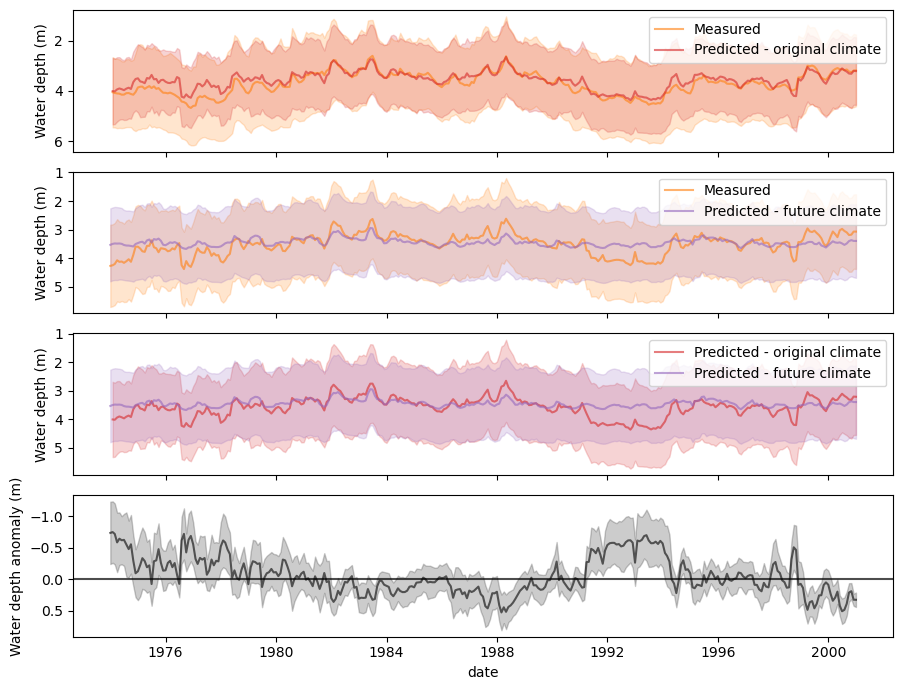

In [17]:
plot_compare_scenario(past, base, pred)

In [18]:
cl = 6
past_filtered = past.loc[past['reg_clusters'] == cl]
base_filtered = base.loc[base['reg_clusters'] == cl]
pred_filtered = pred.loc[pred['reg_clusters'] == cl]

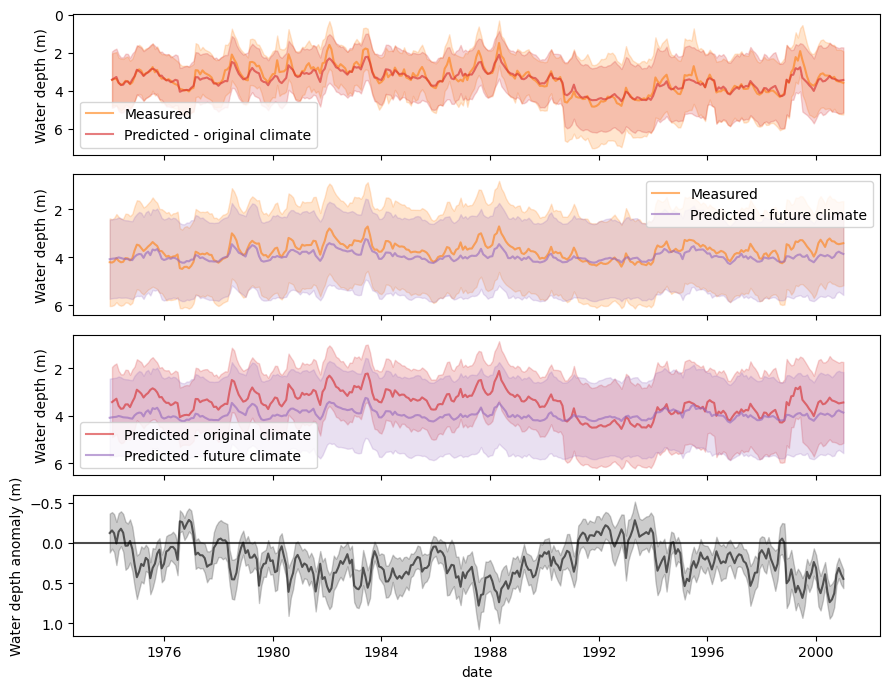

In [19]:
plot_compare_scenario(past_filtered, base_filtered, pred_filtered)

In [20]:
pred['month'] = pred['date'].dt.to_period('M').dt.month
pred.loc[:, pred.columns != 'geometry'].groupby(by=['station_id', 'month']).mean()

reg_clusters  pred_water_depth  tmean_mean  precip_mean  \
station_id month                                                            
12890      1               6.0          2.073011    5.677875     1.629636   
           2               6.0          2.034414    5.970737     1.530259   
           3               6.0          2.002382    9.870088     1.494706   
           4               6.0          1.990441   12.999506     1.471506   
           5               6.0          1.981888   17.748106     1.870549   
...                        ...               ...         ...          ...   
17794      8               4.0          3.444997   23.229157     1.417961   
           9               4.0          3.441346   19.242268     1.627664   
           10              4.0          3.449874   14.478770     1.883157   
           11              4.0          3.457334    9.314700     1.786470   
           12              4.0          3.444328    6.696234     2.074413   

                  tmean_mean_prev_1y_mean  precip_mean_prev_1y_sum  \
station_id month                                                     
12890      1                    14.102391               632.425976   
           2                    14.108643               633.415112   
           3                    14.114043               633.247470   
           4                    14.119584               634.002731   
           5                    14.127214               634.443335   
...                                   ...                      ...   
17794      8                    14.122521               635.463244   
           9                    14.118826               636.463499   
           10                   14.125532               635.493310   
           11                   14.137539               635.521284   
           12                   14.131454               633.406458   

                                date  base_water_depth  water_depth_anomaly  
station_id month                                                             
12890      1     1987-01-31 02:40:00          1.677711             0.395300  
           2     1987-02-28 08:53:20          1.620102             0.414311  
           3     1987-03-31 08:53:20          1.631662             0.370720  
           4     1987-04-30 08:53:20          1.627876             0.362565  
           5     1987-05-31 08:53:20          1.554544             0.427344  
...                              ...               ...                  ...  
17794      8     1987-08-31 08:53:20          3.993387            -0.548390  
           9     1987-09-30 08:53:20          4.029605            -0.588259  
           10    1987-10-31 08:53:20          4.040461            -0.590587  
           11    1987-11-30 08:53:20          4.016290            -0.558956  
           12    1987-07-01 18:00:00          4.032608            -0.588280  

[2544 rows x 9 columns]

### Quarterly

In [21]:
past = pasts['quarterly']
pred = preds['quarterly']
base = bases['quarterly']

Text(0, 0.5, 'Water depth (m)')

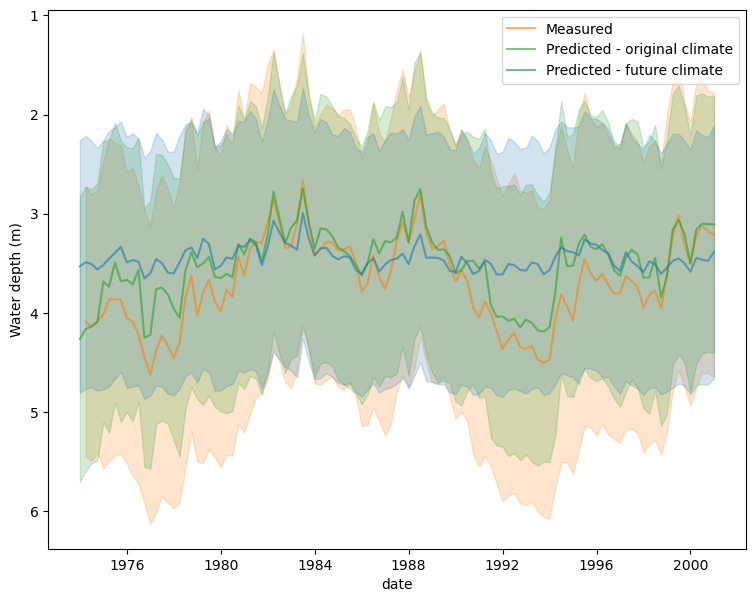

In [22]:
fig, ax = plt.subplots(figsize=(9,7), sharex=True)
ax.invert_yaxis()

sns.lineplot(data=past, x="date", y="water_depth", 
             errorbar='sd', color='tab:orange', alpha=0.6, ax=ax,
             label='Measured')
#sns.lineplot(data=past_weekly, x="date", y="pred_water_depth", 
#             errorbar='sd', color='tab:red', alpha=0.6, ax=ax,
#            label='Predicted - original climate')
sns.lineplot(data=base, x="date", y="pred_water_depth", 
             errorbar='sd', color='tab:green', alpha=0.6, ax=ax,
            label='Predicted - original climate')
sns.lineplot(data=pred, x="date", y="pred_water_depth", 
             errorbar='sd', color='tab:blue', alpha=0.6, ax=ax,
            label='Predicted - future climate')
ax.set_ylabel('Water depth (m)')

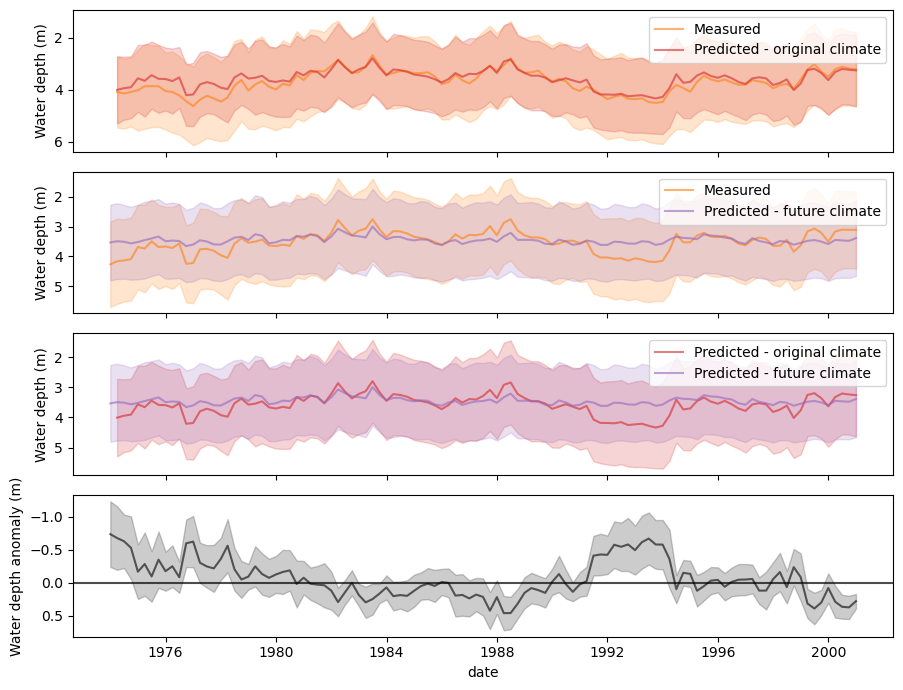

In [23]:
plot_compare_scenario(past, base, pred)

In [24]:
cl = 6
past_filtered = past.loc[past['reg_clusters'] == cl]
base_filtered = base.loc[base['reg_clusters'] == cl]
pred_filtered = pred.loc[pred['reg_clusters'] == cl]

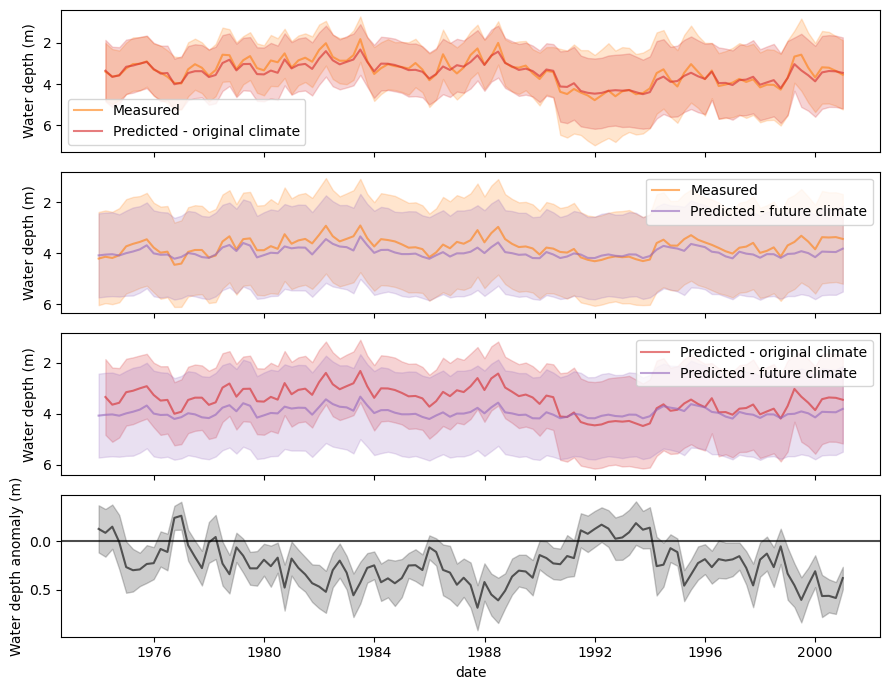

In [25]:
plot_compare_scenario(past_filtered, base_filtered, pred_filtered)

In [26]:
#past.columns

In [27]:
#past.loc[:, past.columns != 'geometry'].groupby(by=['station_id', 'date']).mean()

In [28]:
pred['quarter'] = pred['date'].dt.to_period('Q')#.dt.quarter
pred.loc[:, pred.columns != 'geometry'].groupby(by=['station_id', 'quarter']).mean()

reg_clusters  pred_water_depth  tmean_mean  precip_mean  \
station_id quarter                                                            
12890      1973Q4            6.0          2.231324    5.802041     0.014694   
           1974Q1            6.0          2.171738    9.442229     1.556562   
           1974Q2            6.0          2.167379   16.947253     1.303516   
           1974Q3            6.0          2.286394   20.892308     1.866405   
           1974Q4            6.0          2.124405    9.887755     2.954176   
...                          ...               ...         ...          ...   
17794      1999Q4            4.0          3.465144   10.363736     2.307956   
           2000Q1            4.0          3.423199    8.827473     1.310440   
           2000Q2            4.0          3.404412   18.874066     2.099275   
           2000Q3            4.0          3.435376   21.280440     2.200549   
           2000Q4            4.0          3.439589   11.990204     1.802020   

                    tmean_mean_prev_1y_mean  precip_mean_prev_1y_sum  \
station_id quarter                                                     
12890      1973Q4                 13.716204               574.587551   
           1974Q1                 14.181080               604.759451   
           1974Q2                 14.607030               599.426562   
           1974Q3                 14.203758               611.811805   
           1974Q4                 13.918706               654.538493   
...                                     ...                      ...   
17794      1999Q4                 14.863167               607.667885   
           2000Q1                 15.015498               650.341385   
           2000Q2                 15.238953               645.044440   
           2000Q3                 15.086085               689.659516   
           2000Q4                 15.078112               734.698102   

                         date  base_water_depth  water_depth_anomaly  
station_id quarter                                                    
12890      1973Q4  1973-12-31          2.126394             0.104930  
           1974Q1  1974-03-31          2.051336             0.120402  
           1974Q2  1974-06-30          2.064339             0.103040  
           1974Q3  1974-09-30          1.964242             0.322152  
           1974Q4  1974-12-31          1.648101             0.476304  
...                       ...               ...                  ...  
17794      1999Q4  1999-12-31          3.885382            -0.420238  
           2000Q1  2000-03-31          3.462659            -0.039460  
           2000Q2  2000-06-30          3.268125             0.136287  
           2000Q3  2000-09-30          3.293321             0.142055  
           2000Q4  2000-12-31          3.273641             0.165947  

[23108 rows x 9 columns]

## Anomalies for all stations
neg. anomaly = scenario predicts shallower water than in ref scenario

In [30]:
#pred_weekly.loc[pred_weekly['date'] < pd.to_datetime('2000-10-29')].tail(10)

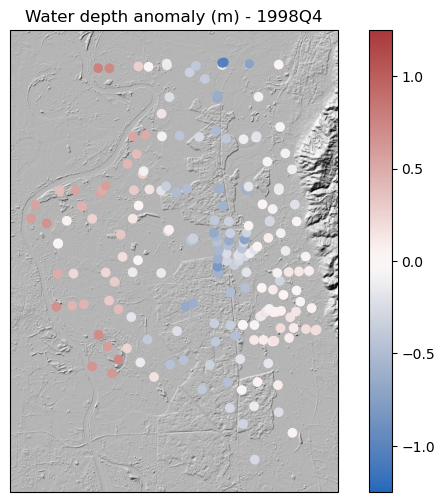

In [31]:
date = pred['quarter'].values[100]
df = pred.loc[pred['quarter'] == date]
plot_anomaly_map(df, date, dem, dem_extent, save=False)

## Interactive plots

In [ ]:
import plotly.graph_objects as go
import nbformat
print(nbformat.__version__)

In [ ]:
# Create a figure
fig = go.Figure()

# Add a trace for the entire dataset
fig.add_trace(go.Scatter(x=pred_weekly['date'], y=pred_weekly['water_depth_anomaly'],
                         mode='lines', name='Value'))

# Create a slider for date selection
steps = []
for date in pred_weekly['date'].unique():
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Date: " + str(date)}],
        label=str(date)
    )
    step["args"][0]["visible"][0] = True # Make the first trace visible
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Date: "},
    pad={"t": 50},
    steps=steps
)]

# Update layout to include sliders
fig.update_layout(
    sliders=sliders
)

# Show the figure
fig.show()